<div class="alert alert-block alert-info">
<h2>Week 6_Part2. NLP (Natural Language Processing) and Corpus Analysis</h2><br><br>

<p>NLTK is the best known Python library for NLP. It has over 50 corpora (i.e. electronic collections of texts) and lexicons, some stemmers and algorithms to play with textual data.<p><br>

<p> Word frequencies has a wide currency in the digital humanities, including digital textual scholarship. We need to tokenize texts in order to be able to count words and sentences; to count how many words are unique (i.e. occur only once in a text); how many and which words are repetitive; to find lexical patterns called n-grams (i.e. combinations of adjacent words or letters; for example, collocations are a type of n-grams). In text computing, <b><ins>tokenization</ins></b> means breaking a text up into words and sentences. The other useful terms are <b><ins>lemmatization</ins></b> and <b><ins>stemmatization</ins></b>. The two approaches are similar on the surface, but they differ in terms of their purpose and application. <b><ins>Stemmatization</ins></b> runs on stemming algorithms that cut off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. The following examples show stems derived from the related inflected word forms, e.g. 'studies' is broken into 'studi-es' and gets the stem 'studi', while the word form 'studying' breaks down to 'study-ing' and has the stem 'study'. <b><ins>Lemmatization</ins></b>, on the other hand, relies on the morphological analysis of each word and is sensitive to a language being analyzed. Lemmatization involves grouping inflected word forms as one word lemma so that they can be analyzed as one word, e.g. word forms <i>run</i>, <i>running</i>, and <i>ran</i>   will be treated as one lemma RUN.</p><br>
</div>

In [1]:
# Check it in the JN environment if a specific third-party package is installed 

help('nltk')

Help on package nltk:

NAME
    nltk

DESCRIPTION
    The Natural Language Toolkit (NLTK) is an open source Python library
    for Natural Language Processing.  A free online book is available.
    (If you use the library for academic research, please cite the book.)
    
    Steven Bird, Ewan Klein, and Edward Loper (2009).
    Natural Language Processing with Python.  O'Reilly Media Inc.
    http://nltk.org/book
    
    @version: 3.4

PACKAGE CONTENTS
    app (package)
    book
    ccg (package)
    chat (package)
    chunk (package)
    classify (package)
    cluster (package)
    collections
    collocations
    compat
    corpus (package)
    data
    decorators
    downloader
    draw (package)
    featstruct
    grammar
    help
    inference (package)
    internals
    jsontags
    lazyimport
    lm (package)
    metrics (package)
    misc (package)
    parse (package)
    probability
    sem (package)
    sentiment (package)
    stem (package)
    tag (package)
    tbl (packa

#### Alternatively, you may print out the entire list of all Python packages already installed on your computer.
#### You can do so by opening Anaconda Prompt command-line window and typing 'pip freeze' or 'pip list' as in the visual below:

![title](pipfreeze.JPG) 

#### If help() function returns the message that no documentation is found or the pip freeze command gives a list with no item, then you need to install that library with the pip package manager. 
#### pip is specific to Python packages. You can run its commands in Windows cmd (or Mac terminal) OR Anaconda Prompt.

<h2>Install and download nltk</h2>  

<p>In Windows cmd (or Mac terminal) OR  Anadconda Prompt, and install the nltk package with  the code <em>pip install -U nltk</em></p>

 
<img src="InstallNltk.JPG">

<p>Then run the Python interpreter and write the code below to import and download NLTK packages:</p>

In [2]:
# With the import statement bring the nltk package into the working environment of JN.

import nltk
nltk.download()

# The NLTK downloader will appear as a pop-up window - 
# click the 'Download' button if you want all things.

# Or you may select only some things from the list it offers and then click 'Download'.

# Once the download is complete, close the pop-up window.

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

<p>The pop-up nltk downloader window looks as below:</p>

<img src="nltkdownloader.JPG">

In [3]:
# Import a collection of literary texts from Project Gutenberg(https://www.gutenberg.org/)
# Project Gutenberg is a library of over 60,000 free eBooks of different genre.

from nltk.corpus import gutenberg as gt

# The following command will print out the list of texts available in the Brown corpus.

gt.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
# Use words() to extract words from the collection of William Blake's poems.

# Pass the title of William Blake's collection as an argument.

Blake = gt.words('blake-poems.txt')

print(Blake)

# It will read in the entire collection though you won't see it all in the output.

# It's already tokenized = each word is listed as a string in a list

print(type(Blake))

['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', ...]
<class 'nltk.corpus.reader.util.StreamBackedCorpusView'>


In [5]:
# From the probability sub-library of the nltk library, import the FreqDist function
# FreqDist computes how often a unique word occurs in a text

from nltk.probability import FreqDist


BlakeFreq = FreqDist(Blake)
BlakeFreq

FreqDist({',': 680, 'the': 351, '.': 201, 'And': 176, 'and': 169, 'of': 131, 'I': 130, 'in': 116, 'a': 108, "'": 104, ...})

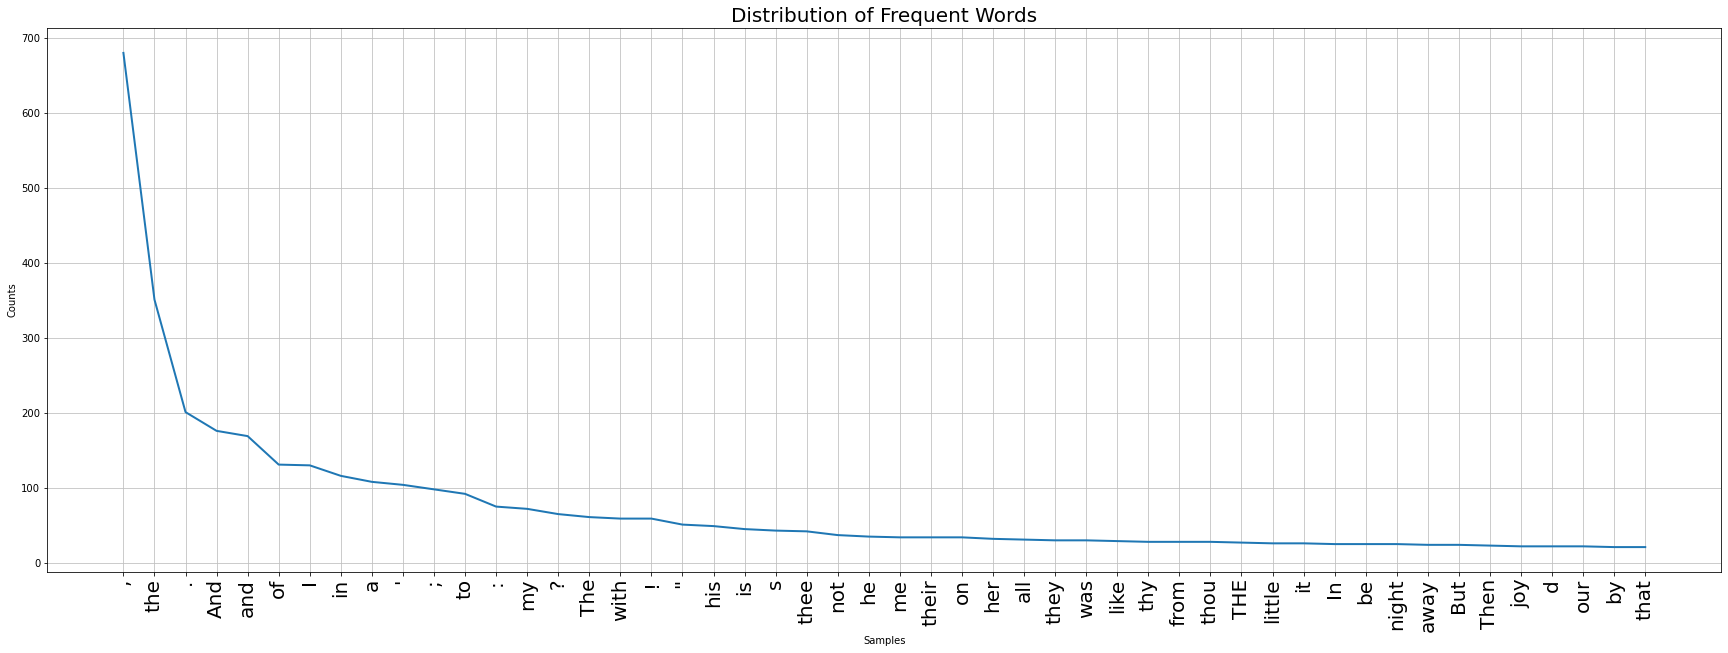

In [6]:
# Visualize the frequency data contained in the dictionary

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,10))
plt.xticks(fontsize=20, rotation=90)
plt.title('Distribution of Frequent Words', fontsize=20)
BlakeFreq.plot(50)

<div class="alert alert-block alert-danger">
    <h3>Data Cleaning</h3>
<p>The code above returns a data structure organized as a Python dictionary where the textual items stand in the key position and the frequency counts are in the value position. We haven't cleaned our textual object, and Python, being case sensitive, will count 'And' and 'and, for example, as two separate words (types). The FreqDist() function also returns the counts of various punctuation marks such as a comma (,) and a full stop (.).</p>
    
<img src="NotClean.JPG">
    
<p>Counting punctuation marks and functions words such as prepositions (e.g. 'in', 'by', etc) and articles (e.g. 'the', 'a') may be productive for some purposes. Yet, if we want to analyze content(i.e. use of adjectives, nouns, verbs etc), we need to clean the textual object. Let's visualize the spread of the frequency counts before we clean the poems of Blake for further analysis. </p>

</div>

In [7]:
# We need to turn all words to lower case in the BlakeFreq variable
# We can write a loop to achieve that, or
# use a list comprehension, which is a construct based on simple mathematical expression
# Looks like a loop but is not written as a code block

BlakeLower = [item.lower() for item in Blake]

BlakeLower

# Our next step is to get rid of the function words and punctuation

['[',
 'poems',
 'by',
 'william',
 'blake',
 '1789',
 ']',
 'songs',
 'of',
 'innocence',
 'and',
 'of',
 'experience',
 'and',
 'the',
 'book',
 'of',
 'thel',
 'songs',
 'of',
 'innocence',
 'introduction',
 'piping',
 'down',
 'the',
 'valleys',
 'wild',
 ',',
 'piping',
 'songs',
 'of',
 'pleasant',
 'glee',
 ',',
 'on',
 'a',
 'cloud',
 'i',
 'saw',
 'a',
 'child',
 ',',
 'and',
 'he',
 'laughing',
 'said',
 'to',
 'me',
 ':',
 '"',
 'pipe',
 'a',
 'song',
 'about',
 'a',
 'lamb',
 '!"',
 'so',
 'i',
 'piped',
 'with',
 'merry',
 'cheer',
 '.',
 '"',
 'piper',
 ',',
 'pipe',
 'that',
 'song',
 'again',
 ';"',
 'so',
 'i',
 'piped',
 ':',
 'he',
 'wept',
 'to',
 'hear',
 '.',
 '"',
 'drop',
 'thy',
 'pipe',
 ',',
 'thy',
 'happy',
 'pipe',
 ';',
 'sing',
 'thy',
 'songs',
 'of',
 'happy',
 'cheer',
 ':!"',
 'so',
 'i',
 'sang',
 'the',
 'same',
 'again',
 ',',
 'while',
 'he',
 'wept',
 'with',
 'joy',
 'to',
 'hear',
 '.',
 '"',
 'piper',
 ',',
 'sit',
 'thee',
 'down',
 'and',
 

<div class="alert alert-block alert-danger">
    <h3>Stop Words & Word Frequencies</h3>
    <p>In computing, stop words are textual items that are highly frequent in a language. In English, such words are articles ("the", "a"), prepositions ("by", "in", etc) and other function words which are opposed to content words such as nouns, adjectives and verbs. To explore the semantic aspects of texts, we need to get rid of those highly frequent words.</p><br>
    <p>In some context, however, the counts of function words may be highly useful. For example, the mainstream view in stylometry is that we tend to use function words in automatic or even unconscious way. For this reason, our use of function words is highly individual. Counting and statistically manipulating function words can help computational linguists to differentiate between the styles of different authors when there is not enough historical record to prove who wrote a text of a disputable origin. This area of applying word frequencies is called 'authorship attribution'. The frequencies of both function and content words are used in (digital) forensics and counter-terrorism. In the context of marketing, word frequencies are often employed in sentiment analysis to find out the preferences and mood of consumers from the language they use in user-generated content.</p>
    
    
<p> </p>

</div>

In [8]:
# The list of the most frequent stopwords is predefined in the nltk module

from nltk.corpus import stopwords

stopwords.words('english')

# There are topword lists for other languages in nltk, e.g. Russian, French etc.
# Use Jieba for Chinese

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# Let's store the nltk stopwords in the variable Stop against which we'll match the words in BlakeLower.

Stop = set(stopwords.words('english'))

Stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
# Let's get rid of stopwords by using the variable stop 
# The statement below sets the slicer to the condition which returns words from the
# BlakeLower variable if no match is found in the predefined stopword list, which
# we stored in the stop variable

BlakeClean = [w for w in BlakeLower if w not in Stop]

BlakeClean

# In result, you will get a list of strings (words) without words in the wtopword list

# However, the returned list of words still contains punctuation marks and obsolete words
# such as thee, thou, thy, and the like.
# We have 2 options here: 1) we may create a custom list of stop words to get rid of those
# or 2) we can lemmatize the words and have 'thou', 'you' and 'thee' replaced with 'you'
# We will learn about lemmatization in Part 2.

['[',
 'poems',
 'william',
 'blake',
 '1789',
 ']',
 'songs',
 'innocence',
 'experience',
 'book',
 'thel',
 'songs',
 'innocence',
 'introduction',
 'piping',
 'valleys',
 'wild',
 ',',
 'piping',
 'songs',
 'pleasant',
 'glee',
 ',',
 'cloud',
 'saw',
 'child',
 ',',
 'laughing',
 'said',
 ':',
 '"',
 'pipe',
 'song',
 'lamb',
 '!"',
 'piped',
 'merry',
 'cheer',
 '.',
 '"',
 'piper',
 ',',
 'pipe',
 'song',
 ';"',
 'piped',
 ':',
 'wept',
 'hear',
 '.',
 '"',
 'drop',
 'thy',
 'pipe',
 ',',
 'thy',
 'happy',
 'pipe',
 ';',
 'sing',
 'thy',
 'songs',
 'happy',
 'cheer',
 ':!"',
 'sang',
 ',',
 'wept',
 'joy',
 'hear',
 '.',
 '"',
 'piper',
 ',',
 'sit',
 'thee',
 'write',
 'book',
 ',',
 'may',
 'read',
 '."',
 'vanish',
 "'",
 'sight',
 ';',
 'pluck',
 "'",
 'hollow',
 'reed',
 ',',
 'made',
 'rural',
 'pen',
 ',',
 'stain',
 "'",
 'water',
 'clear',
 ',',
 'wrote',
 'happy',
 'songs',
 'every',
 'child',
 'may',
 'joy',
 'hear',
 '.',
 'shepherd',
 'sweet',
 'shepherd',
 "'",
 's

In [11]:
# Here we have a for-loop that does exactly the same 
# as the list comprehension construct in the code above
# Choose whichever methods works for you best

# Start with an empty list to which we will append each word 
# that does not match the words in the stopword list which we stored in the stop variable

BlakeClean2 = []

for w in BlakeClean:
    if w not in Stop:
        BlakeClean2.append(w)
        
print(BlakeClean2)

['[', 'poems', 'william', 'blake', '1789', ']', 'songs', 'innocence', 'experience', 'book', 'thel', 'songs', 'innocence', 'introduction', 'piping', 'valleys', 'wild', ',', 'piping', 'songs', 'pleasant', 'glee', ',', 'cloud', 'saw', 'child', ',', 'laughing', 'said', ':', '"', 'pipe', 'song', 'lamb', '!"', 'piped', 'merry', 'cheer', '.', '"', 'piper', ',', 'pipe', 'song', ';"', 'piped', ':', 'wept', 'hear', '.', '"', 'drop', 'thy', 'pipe', ',', 'thy', 'happy', 'pipe', ';', 'sing', 'thy', 'songs', 'happy', 'cheer', ':!"', 'sang', ',', 'wept', 'joy', 'hear', '.', '"', 'piper', ',', 'sit', 'thee', 'write', 'book', ',', 'may', 'read', '."', 'vanish', "'", 'sight', ';', 'pluck', "'", 'hollow', 'reed', ',', 'made', 'rural', 'pen', ',', 'stain', "'", 'water', 'clear', ',', 'wrote', 'happy', 'songs', 'every', 'child', 'may', 'joy', 'hear', '.', 'shepherd', 'sweet', 'shepherd', "'", 'sweet', 'lot', '!', 'morn', 'evening', 'stays', ';', 'shall', 'follow', 'sheep', 'day', ',', 'tongue', 'shall', 'f

In [12]:
# As already mentioned, data cleaning is an essential part in data collection and analysis. 
# E.g. you may wish to remove stopwords from the text.  
# Stopwords are the most frequent words in any language, e.g. articles or pronouns in English
# Counting grammar words may not be valuable for literary analysis, though a lexicographer may find them fascinating.
# Stylommetry (aka authorship analysis) would be interested in counting both, for example.

# Let's define our own list of stopwords to be removed from the text before we analyze it.

stopWords = ['.', '!', ';', ':', '"', ",", "'", '?', '."', '-', '&', 'thee', 'thou', 'thel', 'thy', 'their']

    
stopWords

['.',
 '!',
 ';',
 ':',
 '"',
 ',',
 "'",
 '?',
 '."',
 '-',
 '&',
 'thee',
 'thou',
 'thel',
 'thy',
 'their']

In [13]:
# Let's do yet another round of word (string) cleaning

BlakeClean3 = []

for w in BlakeClean:
    if w not in stopWords:
        BlakeClean3.append(w)
        
print(BlakeClean3)

['[', 'poems', 'william', 'blake', '1789', ']', 'songs', 'innocence', 'experience', 'book', 'songs', 'innocence', 'introduction', 'piping', 'valleys', 'wild', 'piping', 'songs', 'pleasant', 'glee', 'cloud', 'saw', 'child', 'laughing', 'said', 'pipe', 'song', 'lamb', '!"', 'piped', 'merry', 'cheer', 'piper', 'pipe', 'song', ';"', 'piped', 'wept', 'hear', 'drop', 'pipe', 'happy', 'pipe', 'sing', 'songs', 'happy', 'cheer', ':!"', 'sang', 'wept', 'joy', 'hear', 'piper', 'sit', 'write', 'book', 'may', 'read', 'vanish', 'sight', 'pluck', 'hollow', 'reed', 'made', 'rural', 'pen', 'stain', 'water', 'clear', 'wrote', 'happy', 'songs', 'every', 'child', 'may', 'joy', 'hear', 'shepherd', 'sweet', 'shepherd', 'sweet', 'lot', 'morn', 'evening', 'stays', 'shall', 'follow', 'sheep', 'day', 'tongue', 'shall', 'filled', 'praise', 'hears', 'lambs', 'innocent', 'call', 'hears', 'ewes', 'tender', 'reply', 'watching', 'peace', 'know', 'shepherd', 'nigh', 'echoing', 'green', 'sun', 'arise', 'make', 'happy',

In [14]:
# After getting rid of highly frequent words that carry little meaning, 
# let's compute the frequencies of the remaining words

x = FreqDist(BlakeClean3)
x

FreqDist({'little': 45, 'like': 35, 'love': 29, 'sweet': 28, 'night': 28, 'joy': 25, 'away': 24, 'weep': 24, 'father': 22, 'sleep': 21, ...})

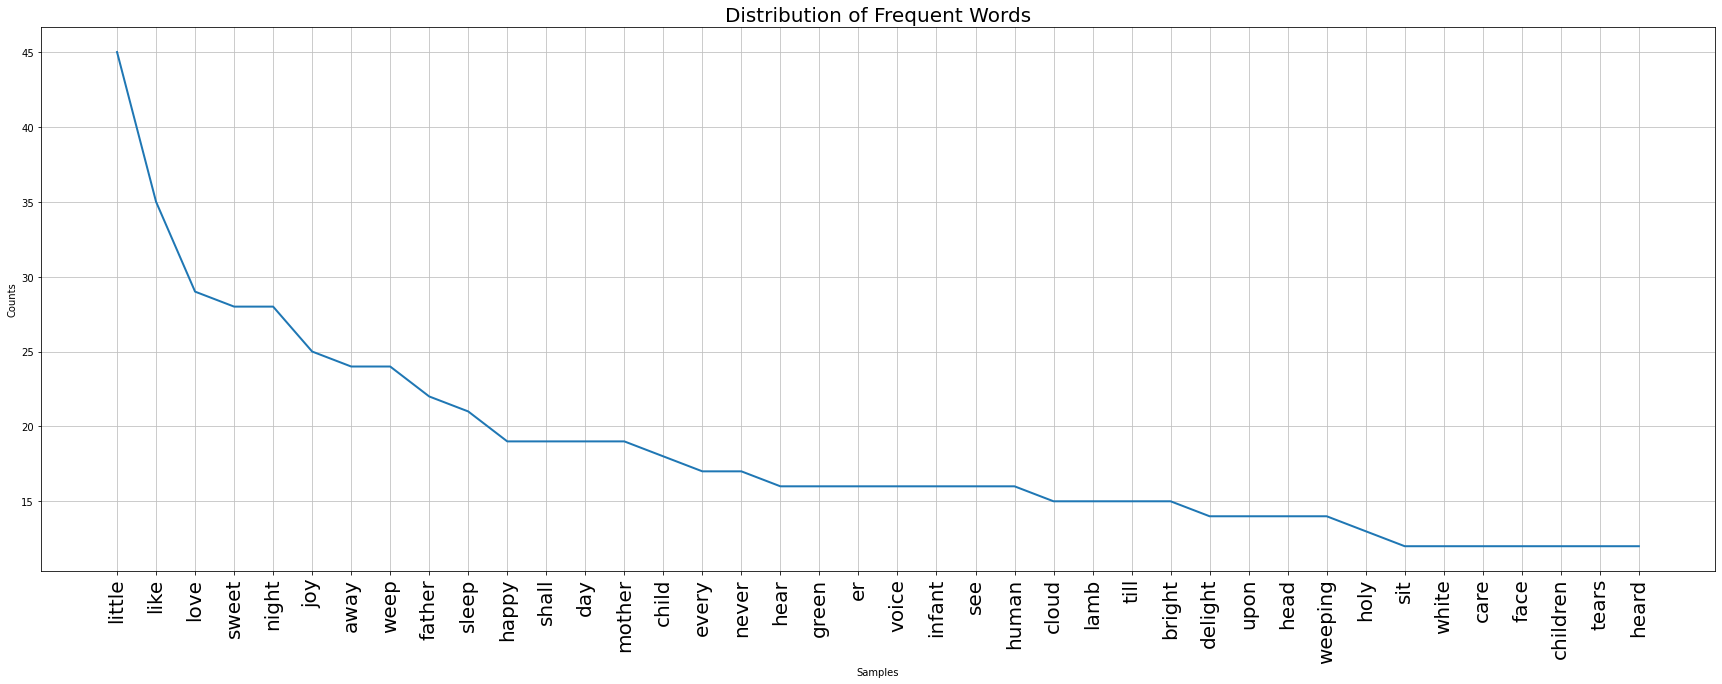

In [15]:
# Let's visualize the computed frequencies

plt.figure(figsize=(30,10))
plt.xticks(fontsize=20, rotation=90)
plt.title('Distribution of Frequent Words', fontsize=20)
x.plot(40)

# Pay attention to what's plotted along the x-axis
# We still have random words such as 'er' or 'oh' in our list
# We might as well do another round of cleaning to get rid of those

In [16]:
# Make a list of word frequencies and how often they occur

Freq30 = x.most_common(30)
Freq30

# Filter top 30 words by passing the numeric argument to the .most_common() method
# The result is a list that contains tuples. This format is easier to convert to DataFrame
# than a dictionary stored in the variable x in code cell [14]

[('little', 45),
 ('like', 35),
 ('love', 29),
 ('sweet', 28),
 ('night', 28),
 ('joy', 25),
 ('away', 24),
 ('weep', 24),
 ('father', 22),
 ('sleep', 21),
 ('happy', 19),
 ('shall', 19),
 ('day', 19),
 ('mother', 19),
 ('child', 18),
 ('every', 17),
 ('never', 17),
 ('hear', 16),
 ('green', 16),
 ('er', 16),
 ('voice', 16),
 ('infant', 16),
 ('see', 16),
 ('human', 16),
 ('cloud', 15),
 ('lamb', 15),
 ('till', 15),
 ('bright', 15),
 ('delight', 14),
 ('upon', 14)]

In [17]:
# Convert the list from above into a pandas' DataFrame

import pandas as pd

df = pd.DataFrame(Freq30, columns=["Words", "Counts"])

df

# What can you say about the dominating imagery of Blake from this table?

,Words,Counts
0,little,45
1,like,35
2,love,29
3,sweet,28
4,night,28
5,joy,25
6,away,24
7,weep,24
8,father,22
9,sleep,21


Text(0.5, 1.0, 'Distribution of Freq Words')

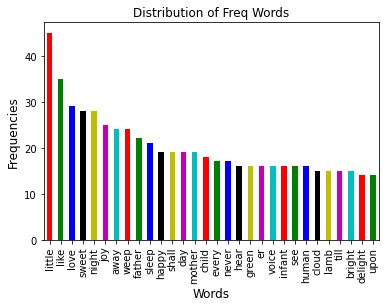

In [18]:
# Let's plot all 30 data points in the df DataFrame as bars

df.plot(kind="bar", x="Words",y="Counts", legend=None, color=list('rgbkymc'))
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.title('Distribution of Freq Words')

Text(0.5, 1.0, 'Distribution of Freq Words')

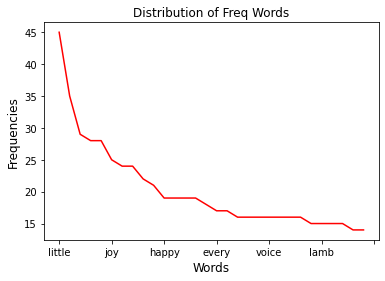

In [19]:
# The default plot will be a line chart

df.plot(x="Words",y="Counts", legend=None, color=list('rgbkymc'))
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.title('Distribution of Freq Words')

<div class="alert alert-block alert-danger">
    <h3>Concordances and Concordance View</h3>
    <p>In text computing and corpus linguistics, a concordance is a list of examples of a word as they occur in a corpus (a highly structured and annotated collection of texts). Such a list would be presented so that the text scholar can read them in the context in which they occur in the text. Concordances have a wide range of applications in dictionary making (lexicography), grammars, literary analysis, discourse analysis, and the like. Concordancers allows us to explore how specific words behave in the context; what other words they attract on the left and right sides.</p>
</div>

In [20]:
# To get a concordance view, we need to turn the Blake object into the NLTK Text object

from nltk.text import Text 

# To get a feel of the authentic language that William Blake used 
# I'm using the uncleaned version of his poems

BlakeObj = nltk.Text(Blake)
BlakeObj

<Text: Poems by William Blake 1789>

In [21]:
# the concordance() method will return a display for specific words
BlakeObj.concordance('wild')

Displaying 9 of 9 matches:
INTRODUCTION Piping down the valleys wild , Piping songs of pleasant glee , On
OY My mother bore me in the southern wild , And I am black , but oh my soul is
r innocent hands . Now like a mighty wild they raise to heaven the voice of so
 for her Maker meek ; And the desert wild Become a garden mild . In the southe
ld . She had wandered long , Hearing wild birds ' song . " Sweet sleep , come 
re can Lyca sleep ? " Lost in desert wild Is your little child . How can Lyca 
ey see their child Starved in desert wild . Pale through pathless ways The fan
aw their sleeping child Among tigers wild . To this day they dwell In a lonely
g . Then I went to the heath and the wild , To the thistles and thorns of the 


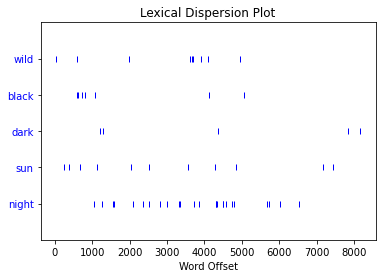

In [22]:
# Create a dispersion plot of selected words 
# to see how they are spread along the length of one text or a collection of texts
# in our case, it's a collection of texts

%matplotlib inline

BlakeObj.dispersion_plot(['wild', 'black', 'dark', 'sun', 'night'])

In [23]:

# To export textual data to a plain text file, use the following command to export the Freq30 list.
# pass the argument "w" to write a new file and export data from the coding environment

file = open('blakeFreq.txt', 'w')
file.write(str(Freq30)) #Freq30 (created above) is a list to be converted to a str for export as a plain file
file.close()

<div style="background-color:#ccccff">
    <h3>You will find more on NLTK packages, tools and statistical text modelling here:</h3> 

<a href="https://www.nltk.org/book/"> NLTK library documentation</a>  
<a href="http://www.nltk.org/howto/collocations.html">The NLTK sub-library 'collocations' </a>  

<h3>Or check the electronic book on natural language processing:</h3> 

<a href="http://www.pitt.edu/~naraehan/ling1330/nltk_book.html"><p>Bird, S., Klein, E. and Loper, E.(2009) Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit. O’Reilly Media.</p></a>
  
</div>